<h1><center>Tworzenie wykresów danych skumulowanych i nieskumulowanych</center></h1>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, quad
from sympy import symbols, Eq, solve
import random
sns.set()
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (8, 8)})

In [17]:
colnames = ['Turns at speech', 'Cumulative score']

In [18]:
df1 = pd.read_csv("../dane/figure1_husband.csv", sep=';', decimal=',', names=colnames, header=None)
df2 = pd.read_csv("../dane/figure1_wife.csv", sep=';', decimal=',', names=colnames, header=None)
df3 = pd.read_csv("../dane/figure2_husband.csv", sep=';', decimal=',', names=colnames, header=None)
df4 = pd.read_csv("../dane/figure2_wife.csv", sep=';', decimal=',', names=colnames, header=None)

In [19]:
df = [df1, df2, df3, df4]

In [20]:
# zamiana kolumny Turns at speech na liczby naturalne
for i in df:
    i["Turns at speech"] = [i for i in range(1,len(i)+1)]
    i

In [21]:
df1

,Turns at speech,Cumulative score
0,1,0.841299
1,2,1.878431
2,3,2.570294
3,4,2.778225
4,5,2.218282
...,...,...
128,129,23.087432
129,130,25.034777
130,131,25.863243
131,132,26.686729


In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Turns at speech   183 non-null    int64  
 1   Cumulative score  183 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB


## Wykresy danych z pracy - skumulowane i nieskumulowane dla 2 par 

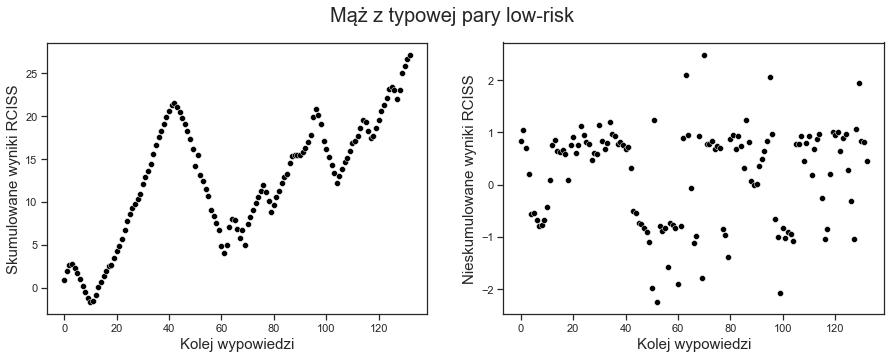

In [27]:
y1 = df1["Cumulative score"]

a = df1["Cumulative score"][0]
df1["Non-cumulative score"] = df1["Cumulative score"].diff()
df1["Non-cumulative score"][0] = a

y2 = df1["Non-cumulative score"]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

fig.suptitle('Mąż z typowej pary low-risk', fontsize='20')
sns.scatterplot(ax=ax[0], data = y1, color = "black")
ax[0].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[0].set_ylabel('Skumulowane wyniki RCISS', fontsize='15')
sns.scatterplot(ax=ax[1], data = y2, color = "black")
ax[1].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[1].set_ylabel('Nieskumulowane wyniki RCISS', fontsize='15')
sns.set_style("ticks")
plt.show()
fig.savefig("dane1.pdf")

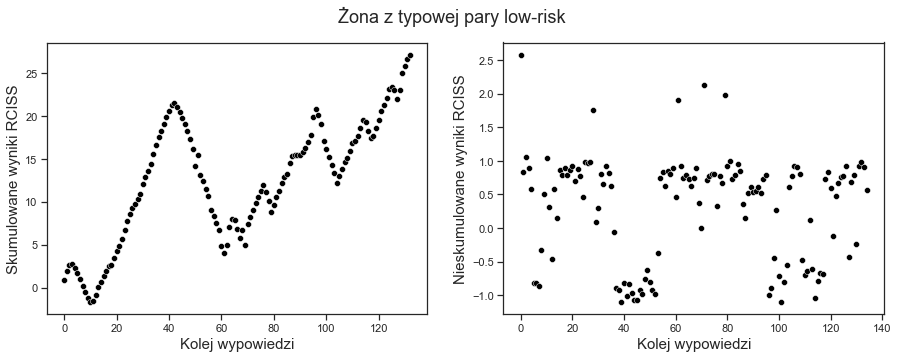

In [28]:
y1 = df1["Cumulative score"]

a = df2["Cumulative score"][0]
df2["Non-cumulative score"] = df2["Cumulative score"].diff()
df2["Non-cumulative score"][0] = a

y2 = df2["Non-cumulative score"]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

fig.suptitle('Żona z typowej pary low-risk')
sns.scatterplot(ax=ax[0], data = y1, color = "black")
ax[0].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[0].set_ylabel('Skumulowane wyniki RCISS', fontsize='15')
sns.scatterplot(ax=ax[1], data = y2, color = "black")
ax[1].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[1].set_ylabel('Nieskumulowane wyniki RCISS', fontsize='15')
sns.set_style("ticks")
plt.show()
fig.savefig("dane2.pdf")

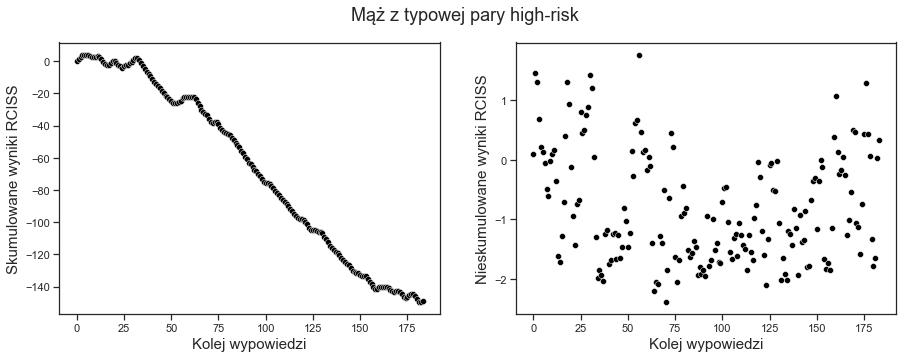

In [29]:
y1 = df3["Cumulative score"]

a = df3["Cumulative score"][0]
df3["Non-cumulative score"] = df3["Cumulative score"].diff()
df3["Non-cumulative score"][0] = a

y2 = df3["Non-cumulative score"]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

fig.suptitle('Mąż z typowej pary high-risk')
sns.scatterplot(ax=ax[0], data = y1, color = "black")
ax[0].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[0].set_ylabel('Skumulowane wyniki RCISS', fontsize='15')
sns.scatterplot(ax=ax[1], data = y2, color = "black")
ax[1].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[1].set_ylabel('Nieskumulowane wyniki RCISS', fontsize='15')
sns.set_style("ticks")
plt.show()
fig.savefig("dane3.pdf")

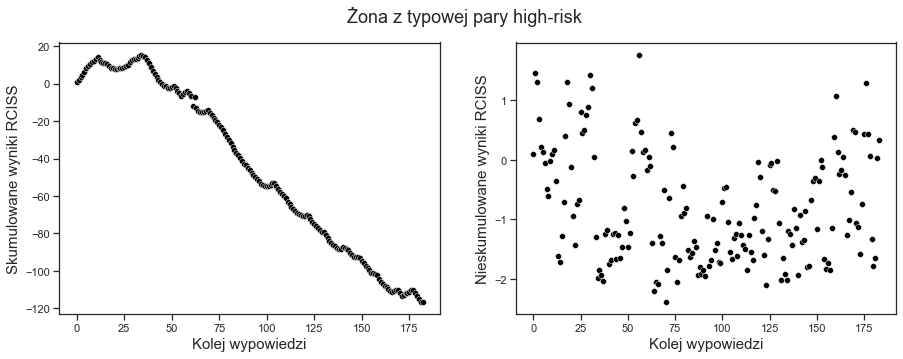

In [32]:
y1 = df4["Cumulative score"]

a = df4["Cumulative score"][0]
df4["Non-cumulative score"] = df4["Cumulative score"].diff()
df4["Non-cumulative score"][0] = a

y2 = df3["Non-cumulative score"]

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

fig.suptitle('Żona z typowej pary high-risk')
sns.scatterplot(ax=ax[0], data = y1, color = "black")
ax[0].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[0].set_ylabel('Skumulowane wyniki RCISS', fontsize='15')
sns.scatterplot(ax=ax[1], data = y2, color = "black")
ax[1].set_xlabel('Kolej wypowiedzi', fontsize='15')
ax[1].set_ylabel('Nieskumulowane wyniki RCISS', fontsize='15')
sns.set_style("ticks")
plt.show()
fig.savefig("dane4.pdf")

## Wykresy z danych z pracy nieskumulowane dla 2 par na seminarium

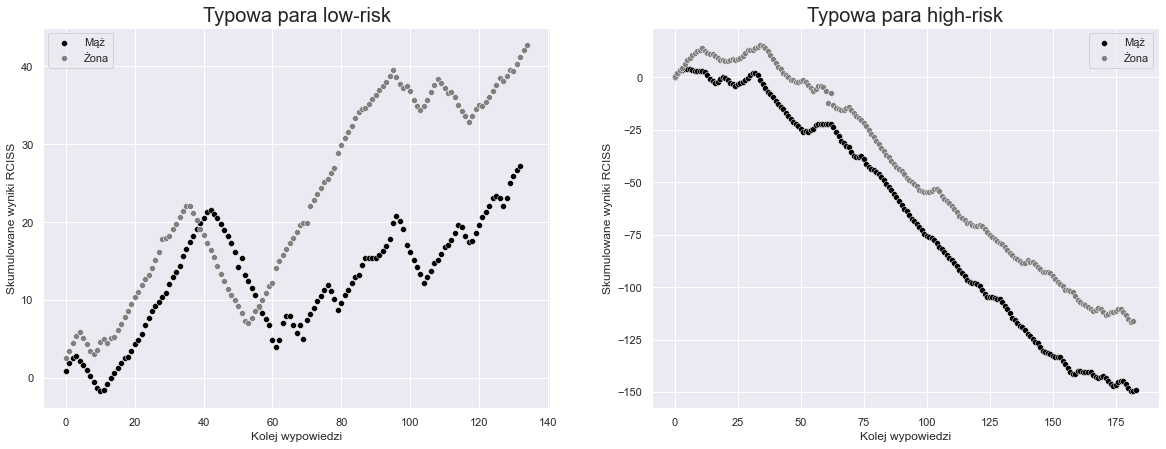

In [13]:
husband_low = df1["Cumulative score"]
wife_low = df2["Cumulative score"]

husband_high = df3["Cumulative score"]
wife_high = df4["Cumulative score"]

fig, ax = plt.subplots(1, 2, figsize = (20, 7))

sns.scatterplot(ax=ax[0], data = husband_low, color = "black", label="Mąż")
sns.scatterplot(ax=ax[0], data = wife_low, color = "grey", label="Żona")
ax[0].set_xlabel('Kolej wypowiedzi')
ax[0].set_ylabel('Skumulowane wyniki RCISS')
ax[0].set_title("Typowa para low-risk", fontsize = 20)
sns.scatterplot(ax=ax[1], data = husband_high, color = "black", label = "Mąż")
sns.scatterplot(ax=ax[1], data = wife_high, color = "grey", label="Żona")
ax[1].set_xlabel('Kolej wypowiedzi')
ax[1].set_ylabel('Skumulowane wyniki RCISS')
ax[1].set_title("Typowa para high-risk", fontsize = 20)
fig.savefig("typowe.png")
plt.show()

## Kolejne wykresy na seminarium

In [14]:
def plotting(data, title, xlim1, ylim1, ylim2):
    y1 = data["Cumulative score"]
    x = data["Turns at speech"]
    
    a = data["Cumulative score"][0]
    data["Non-cumulative score"] = data["Cumulative score"].diff()
    data["Non-cumulative score"][0] = a
    
    y2 = data["Non-cumulative score"]
    
    fig, ax = plt.subplots(2)
    fig.suptitle(title)
    ax[0].scatter(x,y1, color='black')
    ax[1].scatter(x,y2, color='black')
    ax[0].set_xlabel("Turns at speech")
    ax[0].set_ylabel("Cumulative score")
    ax[1].set_xlabel("Turns at speech")
    ax[1].set_ylabel("Non-cumulative score")
    
    ax[0].set_xlim(xlim1)
    ax[0].set_ylim(ylim1)
    ax[1].set_xlim(xlim1)
    ax[1].set_ylim(ylim2)

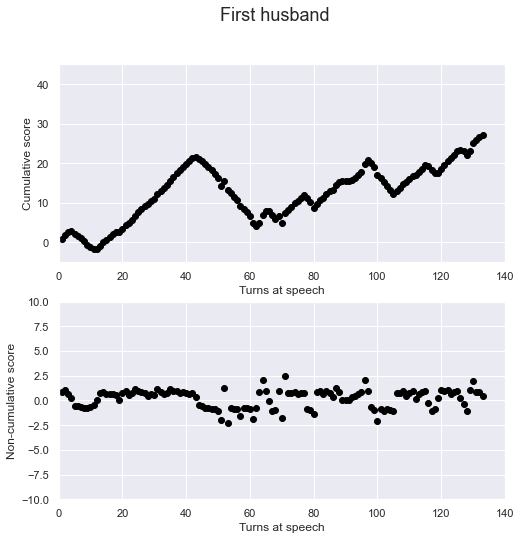

In [15]:
plotting(df1, "First husband", [0,140], [-5,45], [-10, 10])

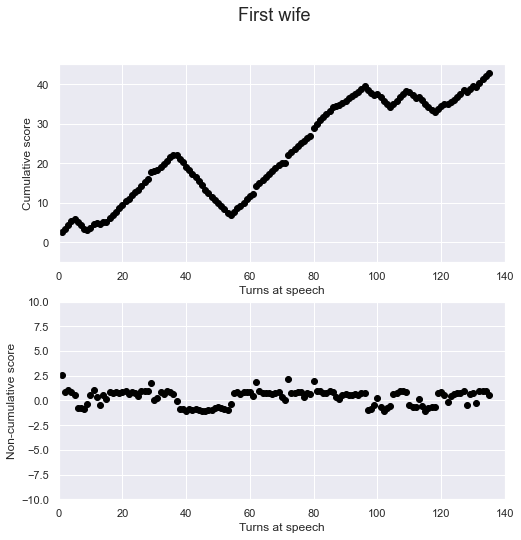

In [16]:
plotting(df2, "First wife", [0,140], [-5,45], [-10, 10])

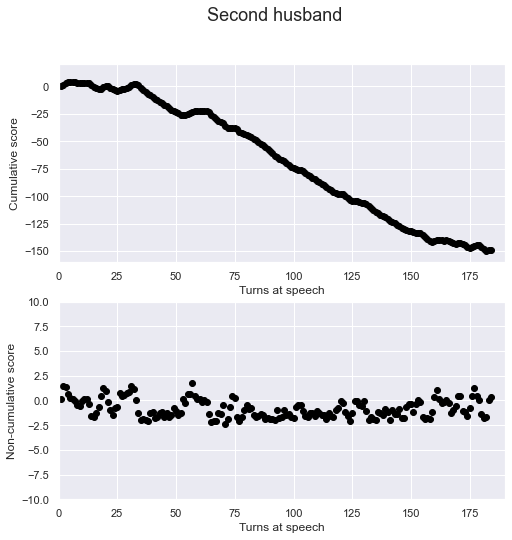

In [17]:
plotting(df3, "Second husband", [0,190], [-160,20], [-10, 10])

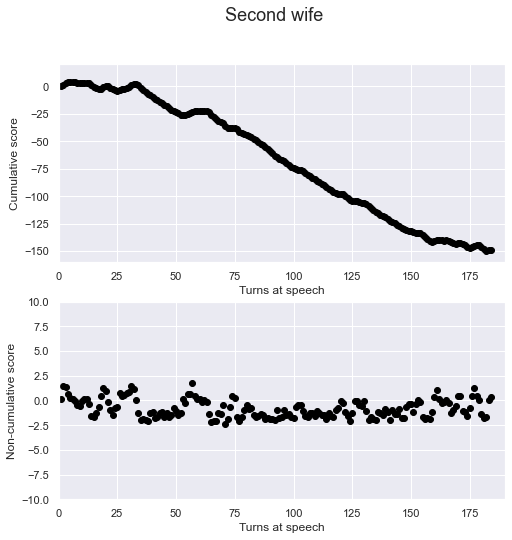

In [18]:
plotting(df3, "Second wife", [0,190], [-160,20], [-10, 10])

<h1><center>Wykresy przykładowych funkcji wpływu</center></h1>

In [33]:
def f(x, a):
    y = a*x
    return y

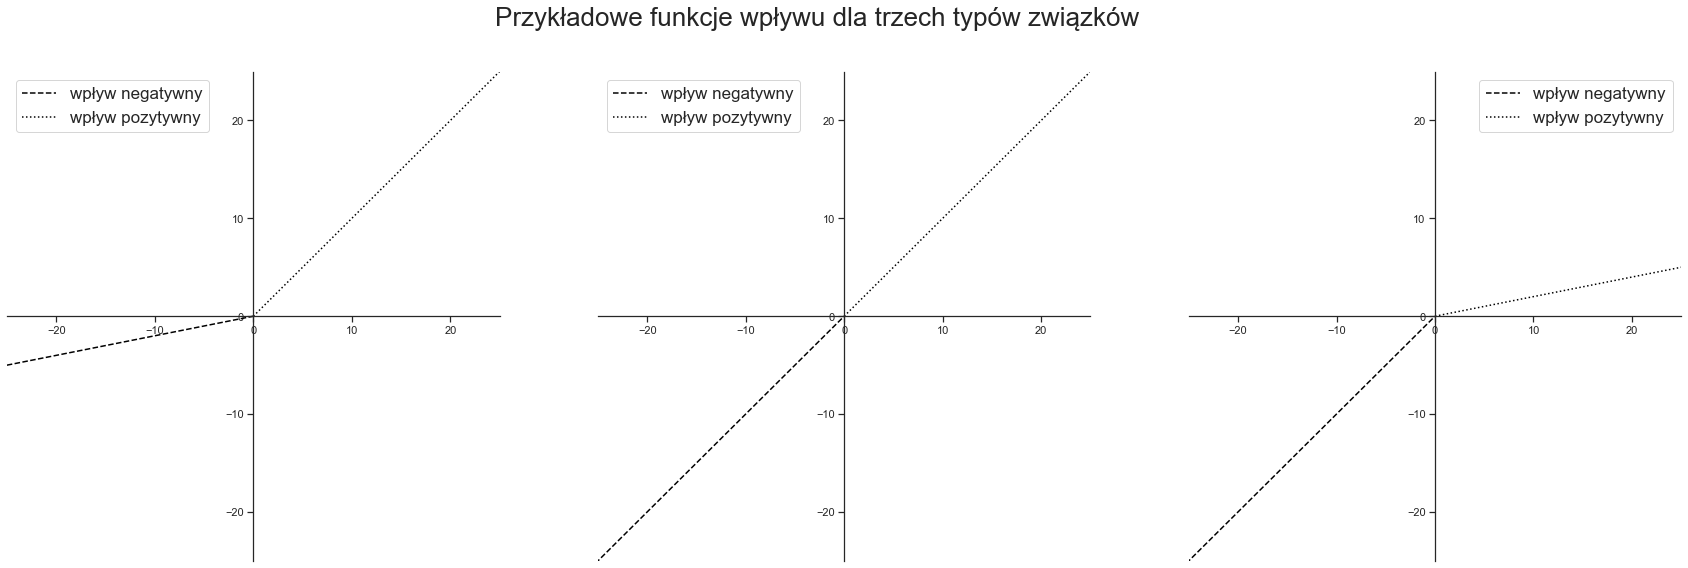

In [43]:
x1 = np.linspace(-100, 0, 100)
x2 = np.linspace(0, 100, 100)
y1 = f(x1, 1)
y2 = f(x2, 1)

y3 = f(x1, 0.2)
y4 = f(x2, 0.2)
fig, ax = plt.subplots(1, 3, figsize=(30, 9))
sns.set_style("ticks")


# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')

ax[0].plot(x1, y3, label = 'wpływ negatywny', linestyle='--', color='black')
ax[0].plot(x2, y2, label='wpływ pozytywny', linestyle=':', color='black')
ax[0].set_xlim(-25,25)
ax[0].set_ylim(-25,25)
ax[0].legend(fontsize = 17)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')

ax[1].plot(x1, y1, label = 'wpływ negatywny', linestyle='--', color='black')
ax[1].plot(x2, y2, label='wpływ pozytywny', linestyle=':', color='black')
ax[1].set_xlim(-25,25)
ax[1].set_ylim(-25,25)
ax[1].legend(fontsize = 17)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax[2].spines['left'].set_position('center')
ax[2].spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax[2].spines['right'].set_color('none')
ax[2].spines['top'].set_color('none')

ax[2].plot(x1, y1, label = 'wpływ negatywny', linestyle='--', color='black')
ax[2].plot(x2, y4, label='wpływ pozytywny', linestyle=':', color='black')
ax[2].set_xlim(-25,25)
ax[2].set_ylim(-25,25)
ax[2].legend(fontsize = 17)

fig.suptitle('Przykładowe funkcje wpływu dla trzech typów związków', fontsize = 26)
fig.savefig("wplyw.pdf")

<h1><center>Przykładowe trajektorie rozwiązań dla 3 low-risk modeli małżeństwa - wyznaczane numerycznie z użyciem Monte Carlo</center></h1>

In [44]:
def MC(r1, r2, x0, y0, a1, a2, epsilon, N, rhs):
    
    array_x = np.zeros(100)
    array_y = np.zeros(100)
    array_t = np.zeros(100)
    
    for i in range(N):
        x00 = random.uniform(x0-epsilon, x0+epsilon)
        y00 = random.uniform(y0-epsilon, y0+epsilon)

        array_t += rhs(r1, r2, x0, y0, a1, a2, x00, y00).t
        array_x += rhs(r1, r2, x0, y0, a1, a2, x00, y00).y.T[:, 0]
        array_y += rhs(r1, r2, x0, y0, a1, a2, x00, y00).y.T[:, 1]
        
    array_t = array_t/N
    array_x = array_x/N  
    array_y = array_y/N
    
    return array_t, array_x, array_y

## Validating

In [45]:
def rhs_validating(r1, r2, x0, y0, a1, a2, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+a1*v[1], r2*(y0-v[1]) + a2*v[0]]
    
    res = solve_ivp(eq, (0, 20), [x00, y00], t_eval=np.linspace(0, 20, 100))
    return res

7.199999999999999
7.799999999999999


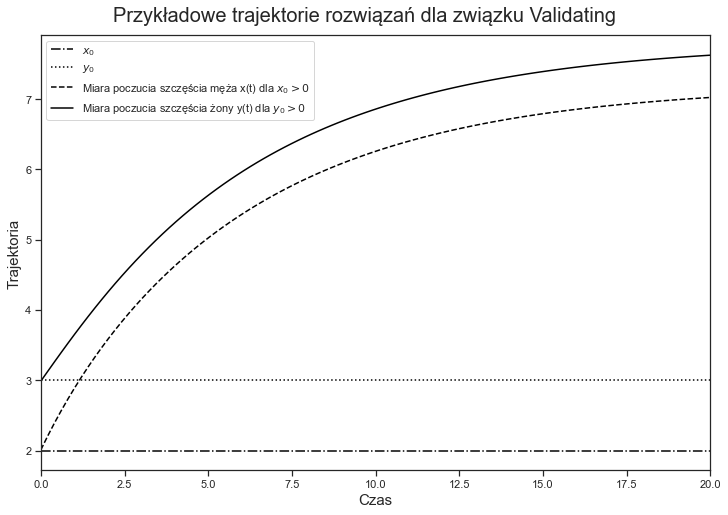

In [46]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0 = 2
y0 = 3

array_t, array_x, array_y = MC(r1, r2, x0, y0, a1, a2, epsilon, N, rhs_validating)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} > 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Validating', fontsize = 20,
            y=0.93)
# fig.savefig("validating1.pdf")
plt.show()

-7.199999999999999
-7.799999999999999


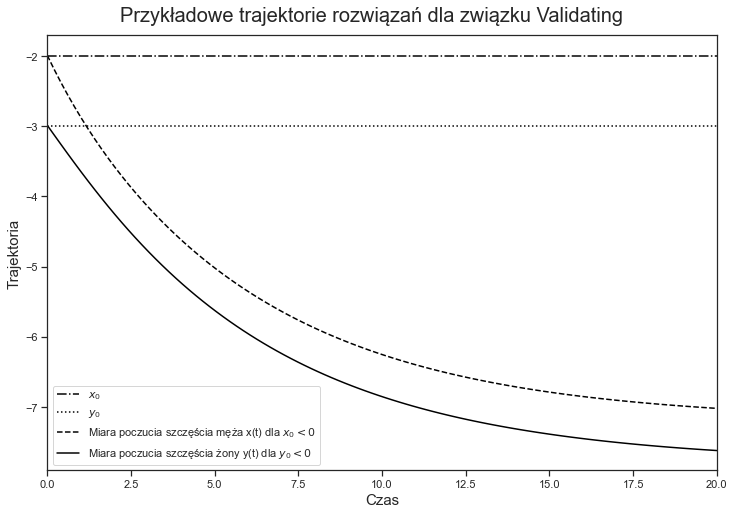

In [47]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0 = -2
y0 = -3

array_t, array_x, array_y = MC(r1, r2, x0, y0, a1, a2, epsilon, N, rhs_validating)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} < 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Validating', fontsize = 20,
            y=0.93)
# fig.savefig("validating2.pdf")
plt.show()

14.399999999999999
24.599999999999998
-0.8999999999999999
0.8999999999999999


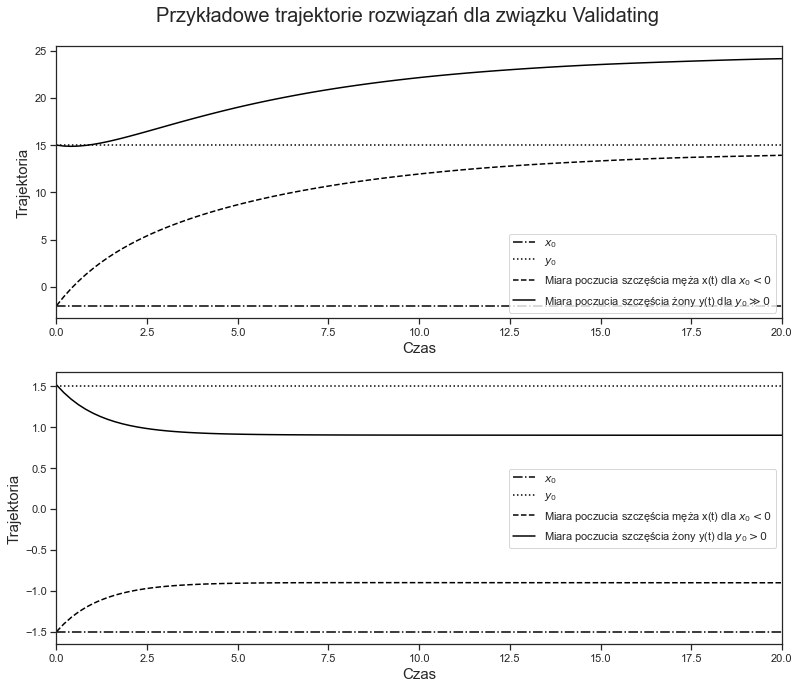

In [48]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0_1 = -2
y0_1 = 15

x0_2 = -1.5
y0_2 = 1.5

array_t1, array_x1, array_y1 = MC(r1, r2, x0_1, y0_1, a1, a2, epsilon, N, rhs_validating)
array_t2, array_x2, array_y2 = MC(r1, r2, x0_2, y0_2, a1, a2, epsilon, N, rhs_validating)


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,11))
ax1.axhline(y=x0_1, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0_1, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t1, array_x1, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t1, array_y1, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} \gg 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()

ax2.axhline(y=x0_2, linestyle="-.", color = "black", label = "$x_{0}$")
ax2.axhline(y=y0_2, linestyle=":", color = "black", label = "$y_{0}$")
ax2.plot(array_t2, array_x2, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax2.plot(array_t2, array_y2, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax2.set_xlim(0,20)
ax2.set_xlabel("Czas", fontsize = 15)
ax2.set_ylabel("Trajektoria", fontsize=15)
ax2.legend()

fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Validating', fontsize = 20,
            y=0.93)
# fig.savefig("validating3.pdf")
plt.show()

## Avoiding

In [49]:
def I(x):
    if x>0:
        return x
    else:
        return 0

In [50]:
def rhs_avoiding(r1, r2, x0, y0, a1, a2, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+a1*I(v[1]), r2*(y0-v[1]) + a2*I(v[0])]
    
    res = solve_ivp(eq, (0, 20), [x00, y00], t_eval=np.linspace(0, 20, 100))
    return res

7.199999999999999
7.799999999999999


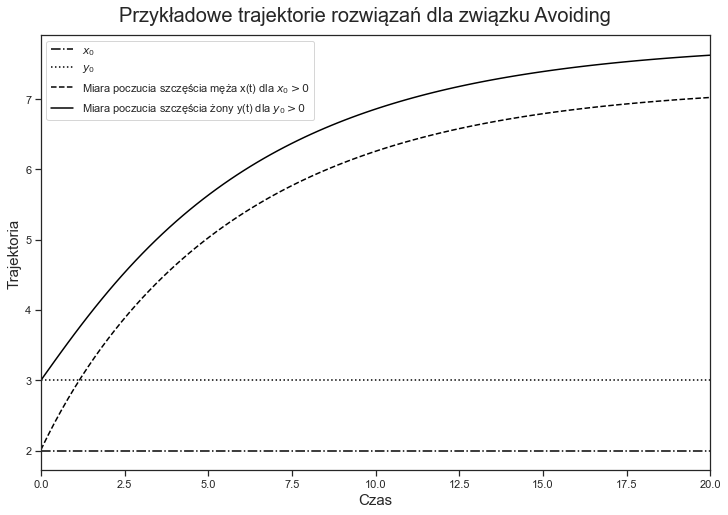

In [51]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0 = 2
y0 = 3


array_t, array_x, array_y = MC(r1, r2, x0, y0, a1, a2, epsilon, N, rhs_avoiding)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} > 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Avoiding', fontsize = 20,
            y=0.93)
# fig.savefig("avoiding1.pdf")
plt.show()

-7.199999999999999
-7.799999999999999


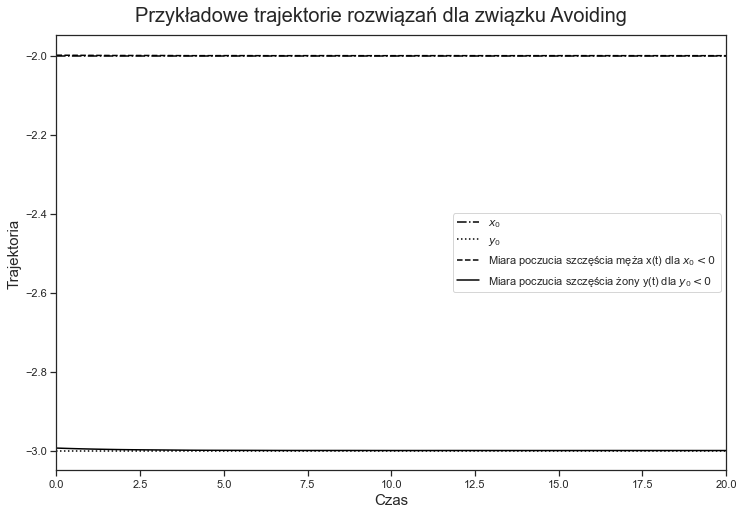

In [52]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0 = -2
y0 = -3

array_t, array_x, array_y = MC(r1, r2, x0, y0, a1, a2, epsilon, N, rhs_avoiding)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} < 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Avoiding', fontsize = 20,
            y=0.93)
# fig.savefig("avoiding2.pdf")
plt.show()

14.399999999999999
24.599999999999998
-0.8999999999999999
0.8999999999999999


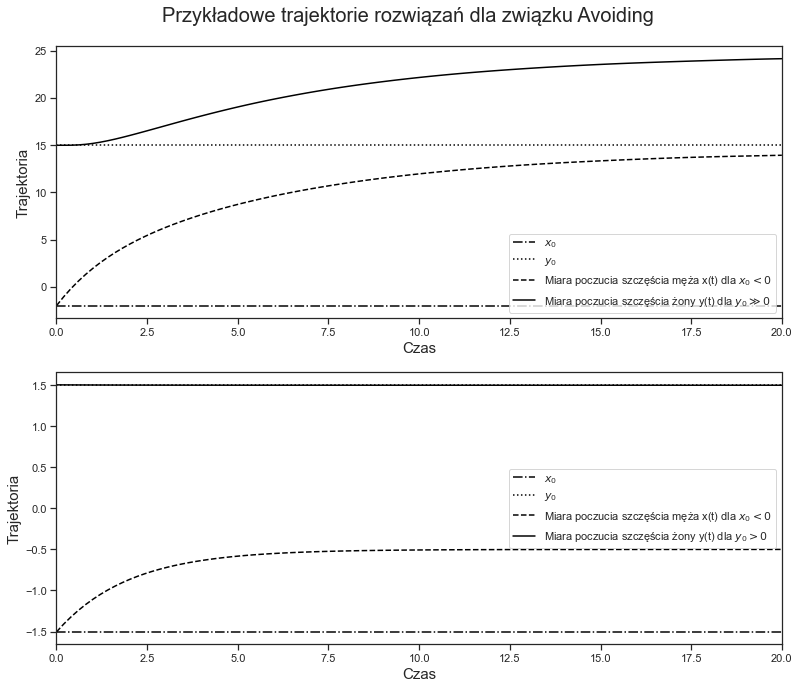

In [53]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
epsilon = 1.5
N = 10000

x0_1 = -2
y0_1 = 15

x0_2 = -1.5
y0_2 = 1.5


array_t1, array_x1, array_y1 = MC(r1, r2, x0_1, y0_1, a1, a2, epsilon, N, rhs_avoiding)
array_t2, array_x2, array_y2 = MC(r1, r2, x0_2, y0_2, a1, a2, epsilon, N, rhs_avoiding)


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,11))
ax1.axhline(y=x0_1, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0_1, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t1, array_x1, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t1, array_y1, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} \gg 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()

ax2.axhline(y=x0_2, linestyle="-.", color = "black", label = "$x_{0}$")
ax2.axhline(y=y0_2, linestyle=":", color = "black", label = "$y_{0}$")
ax2.plot(array_t2, array_x2, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax2.plot(array_t2, array_y2, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax2.set_xlim(0,20)
ax2.set_xlabel("Czas", fontsize = 15)
ax2.set_ylabel("Trajektoria", fontsize=15)
ax2.legend()

fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Avoiding', fontsize = 20,
            y=0.93)
# fig.savefig("avoiding3.pdf")
plt.show()

## Volatile

In [54]:
def MC_(r1, r2, x0, y0, a1, a2, b1, b2, epsilon, N, rhs):
    
    array_x = np.zeros(100)
    array_y = np.zeros(100)
    array_t = np.zeros(100)
    
    for i in range(N):
        x00 = random.uniform(x0-epsilon, x0+epsilon)
        y00 = random.uniform(y0-epsilon, y0+epsilon)

        array_t += rhs(r1, r2, x0, y0, a1, a2, b1, b2, x00, y00).t
        array_x += rhs(r1, r2, x0, y0, a1, a2, b1, b2, x00, y00).y.T[:, 0]
        array_y += rhs(r1, r2, x0, y0, a1, a2, b1, b2, x00, y00).y.T[:, 1]
        
    array_t = array_t/N
    array_x = array_x/N
    array_y = array_y/N
    
    return array_t, array_x, array_y

In [55]:
def I1(x, a1, b1):
    if x>0:
        return a1*x
    else:
        return b1*x

In [56]:
def I2(x, a2, b2):
    if x>0:
        return a2*x
    else:
        return b2*x

In [63]:
def rhs_volatile(r1, r2, x0, y0, a1, a2, b1, b2, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+I1(v[1], a1, b1), r2*(y0-v[1]) + I2(v[0], a2, b2)]
    
    res = solve_ivp(eq, (0, 100), [x00, y00], t_eval=np.linspace(0, 100, 100))
    return res

7.199999999999999
7.799999999999999


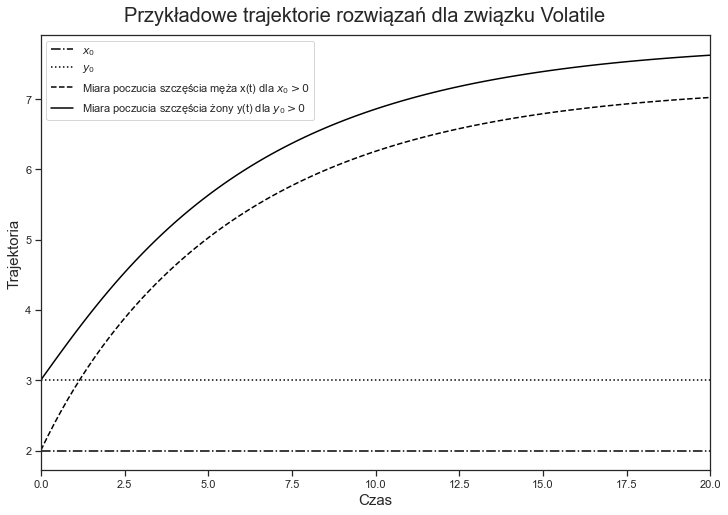

In [58]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
b1 = 0.45
b2 = 0.45
epsilon = 1.5
N = 10000

x0 = 2
y0 = 3

array_t, array_x, array_y = MC_(r1, r2, x0, y0, a1, a2, b1, b2, epsilon, N, rhs_volatile)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} > 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlim(0,20)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Volatile', fontsize = 20,
            y=0.93)
# fig.savefig("volatile1.pdf")
plt.show()

-24.736842105263165
-25.26315789473685


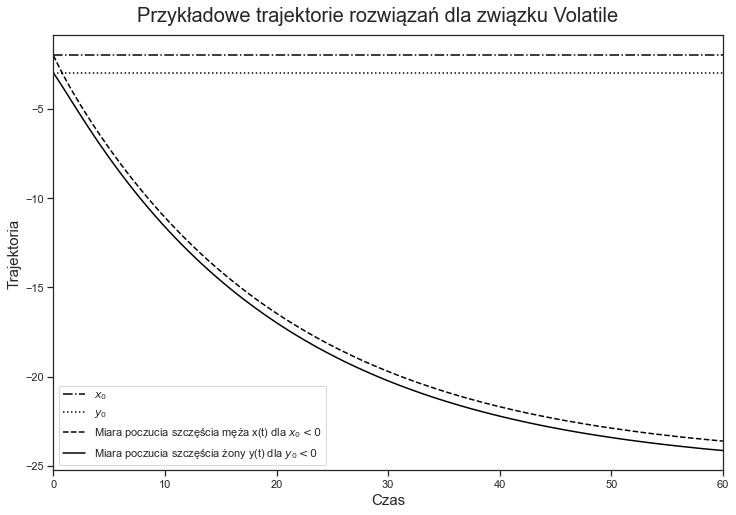

In [62]:
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
b1 = 0.45
b2 = 0.45
epsilon = 1.5
N = 10000

x0 = -2
y0 = -3

array_t, array_x, array_y = MC_(r1, r2, x0, y0, a1, a2, b1, b2, epsilon, N, rhs_volatile)

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")
ax1.axhline(y=x0, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t, array_x, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t, array_y, linestyle = "-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} < 0$")
ax1.set_xlim(0,60)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()
fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Volatile', fontsize = 20,
            y=0.93)
# fig.savefig("volatile2.pdf")
plt.show()

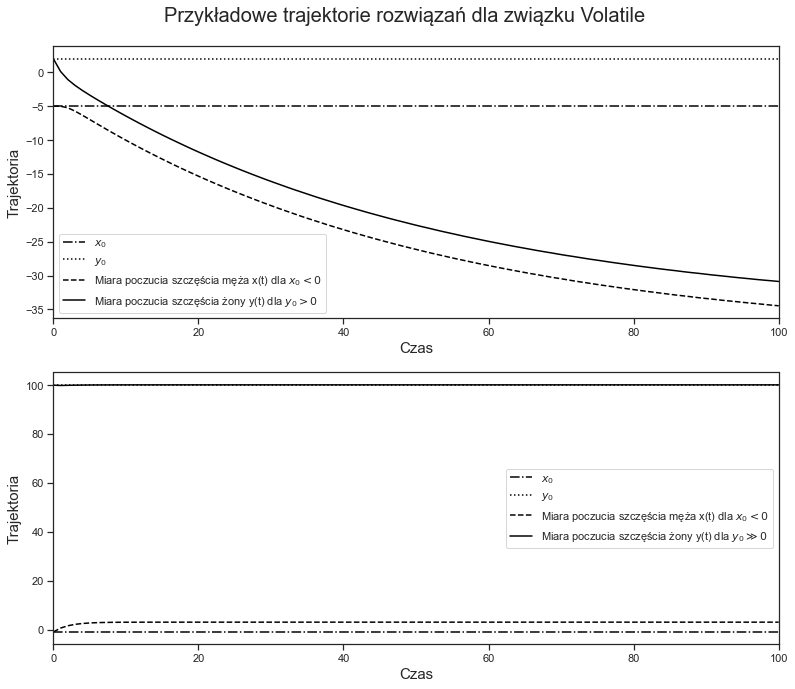

In [64]:
r1 = 0.5
r2 = 0.5
a1 = 1/50
a2 = 1/50
b1 = 24/50
b2 = 24/50
epsilon = 1.5
N = 10000

x0_1 = -5
y0_1 = 2

x0_2 = -1
y0_2 = 100

array_t1, array_x1, array_y1 = MC_(r1, r2, x0_1, y0_1, a1, a2, b1, b2, epsilon, N, rhs_volatile)
array_t2, array_x2, array_y2 = MC_(r1, r2, x0_2, y0_2, a1, a2, b1, b2, epsilon, N, rhs_volatile)


fig, (ax1, ax2) = plt.subplots(2,1, figsize=(13,11))
ax1.axhline(y=x0_1, linestyle="-.", color = "black", label = "$x_{0}$")
ax1.axhline(y=y0_1, linestyle=":", color = "black", label = "$y_{0}$")
ax1.plot(array_t1, array_x1, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax1.plot(array_t1, array_y1, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} > 0$")
ax1.set_xlim(0,100)
ax1.set_xlabel("Czas", fontsize = 15)
ax1.set_ylabel("Trajektoria", fontsize=15)
ax1.legend()

ax2.axhline(y=x0_2, linestyle="-.", color = "black", label = "$x_{0}$")
ax2.axhline(y=y0_2, linestyle=":", color = "black", label = "$y_{0}$")
ax2.plot(array_t2, array_x2, linestyle="--", color="black", label = "Miara poczucia szczęścia męża x(t) dla $x_{0} < 0$")
ax2.plot(array_t2, array_y2, linestyle="-", color="black", label = "Miara poczucia szczęścia żony y(t) dla $y_{0} \gg 0$")
ax2.set_xlim(0,100)
ax2.set_xlabel("Czas", fontsize = 15)
ax2.set_ylabel("Trajektoria", fontsize=15)
ax2.legend()

fig.suptitle('Przykładowe trajektorie rozwiązań dla związku Volatile', fontsize = 20,
            y=0.93)
# fig.savefig("volatile3.pdf")
plt.show()

## Szczególny przypadek dla związku Avoiding - wykresy

In [6]:
def I(x):
    if x>0:
        return x
    else:
        return 0

In [7]:
# rozwiązanie numeryczne układu

def rhs(r1, r2, x0, y0, a2, X, Y):
    
    def eq(s, v):
        return [r1*(x0-v[0]), r2*(y0-v[1]) + a2*I(v[0])]
    
    res = solve_ivp(eq, (0, 10), [X, Y], t_eval=np.linspace(0, 10, 100))
    return res

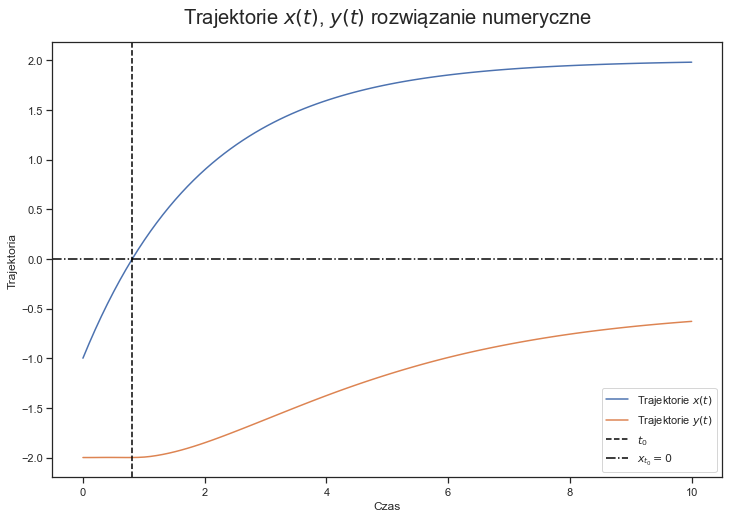

In [8]:
x0 = 2 # x0 > 0
X = -1 # X < 0
y0 = -2
Y = -2
r1 = 0.5
r2 = 0.4
a2 = 0.3

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.set_style("ticks")

plt.plot(rhs(r1, r2, x0, y0, a2, X, Y).t, rhs(r1, r2, x0, y0, a2, X, Y).y.T[:, 0], label=r'Trajektorie $x\left(t\right)$')
plt.plot(rhs(r1, r2, x0, y0, a2, X, Y).t, rhs(r1, r2, x0, y0, a2, X, Y).y.T[:, 1], label=r'Trajektorie $y\left(t\right)$')
plt.axvline(x=-1/r1*np.log(x0/(x0-X)), color='black', linestyle="--", label=r'$t_0$')
plt.axhline(y=0, label=r'$x_{t_0}=0$', color = 'black', linestyle="-.")
# plt.title(r"Trajektorie $x\left(t\right)$, $y\left(t\right)$ z oznaczeniem momentu $t_0$ zmiany wartości funkcji wpływu",
#          fontsize = 20, y=1.03)
plt.title(r"Trajektorie $x\left(t\right)$, $y\left(t\right)$ rozwiązanie numeryczne",
         fontsize = 20, y=1.03)
plt.xlabel("Czas")
plt.ylabel("Trajektoria")
plt.legend()
plt.show()


In [1]:
# rozwiązanie wyznaczone analitycznie

def x(t, X, x0, r1):
    
    f = (X-x0)*np.exp(-r1*t)+x0
    
    return f

def y(x0, y0, X, Y, r1, r2, a2, t):
    
    t0 = -1/r1*np.log(x0/(x0-X))
    
    if t<t0:
        f = np.exp(-r2*t)*(Y+y0*(np.exp(r2*t)-1))
    elif t>t0:
        f = np.exp(-r2*t)*(Y+y0*(np.exp(r2*t)-1) + a2*(X-x0)/(r2-r1)*(np.exp(t*(r2-r1))-np.exp(t0*(r2-r1)))+a2*x0/r2*(np.exp(r2*t)-np.exp(t0*r2)))
    
    return f

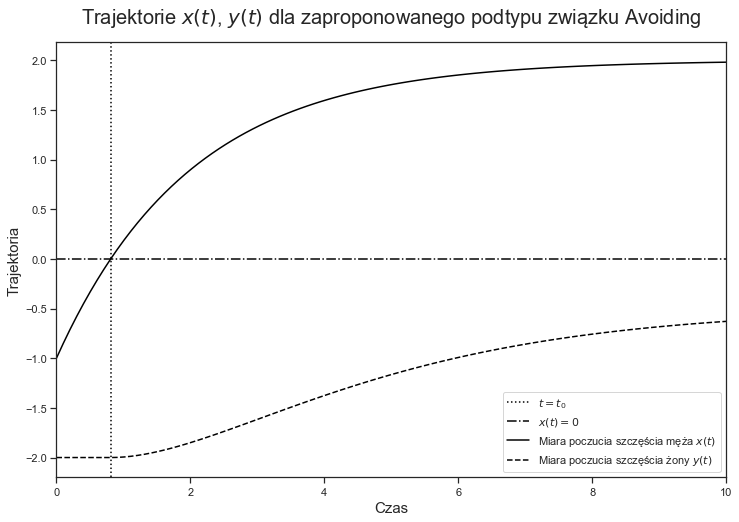

In [5]:
t = np.linspace(0,10,100)
x0 = 2 # x0 > 0
X = -1 # X < 0
y0 = -2
Y = -2
r1 = 0.5
r2 = 0.4
a2 = 0.3

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.set_style("ticks")

plt.axvline(x=-1/r1*np.log(x0/(x0-X)), color='black', linestyle=":", label=r'$t = t_0$')
plt.axhline(y=0, label=r'$x\left(t\right)=0$', color = 'black', linestyle="-.")
plt.plot(t, [x(i, X, x0, r1) for i in t], color='black', linestyle="-", label=r'Miara poczucia szczęścia męża $x\left(t\right)$')
plt.plot(t, [y(x0, y0, X, Y, r1, r2, a2, i) for i in t], color='black', linestyle="--", label=r'Miara poczucia szczęścia żony $y\left(t\right)$')
plt.title(r"Trajektorie $x\left(t\right)$, $y\left(t\right)$ dla zaproponowanego podtypu związku Avoiding",
         fontsize = 20, y=1.03)
plt.xlabel("Czas", fontsize = 15)
plt.ylabel("Trajektoria", fontsize = 15)
plt.xlim(0,10)
plt.legend()
# plt.savefig("new_avoiding.pdf")
plt.show()